<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.080475,33.471059,60.520875,15.431895,176.504304,153.117291,23.387013
1,0.0,1.0,59.726859,47.773945,47.238749,-25.080064,139.659489,161.267488,-21.607999
2,0.0,2.0,21.373803,52.039824,56.237478,-1.884752,137.766354,130.206015,7.560338
3,0.0,3.0,40.325087,35.085181,80.425682,-5.721276,160.114674,152.006519,8.108155
4,0.0,4.0,57.290627,23.746854,47.774020,-5.753300,133.058201,132.464838,0.593364
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,57.689781,76.230008,91.508898,-33.822890,201.605797,229.711452,-28.105655
19996,999.0,16.0,56.225424,87.478709,61.524350,-20.299409,194.929075,211.916471,-16.987396
19997,999.0,17.0,67.184845,82.461873,84.990022,-9.363436,235.273304,238.878717,-3.605413
19998,999.0,18.0,36.683984,25.928292,24.918677,6.011468,103.542422,105.978825,-2.436403


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    57.080475  33.471059  60.520875  ...  176.504304  153.117291  23.387013
      1.0    59.726859  47.773945  47.238749  ...  139.659489  161.267488 -21.607999
      2.0    21.373803  52.039824  56.237478  ...  137.766354  130.206015   7.560338
      3.0    40.325087  35.085181  80.425682  ...  160.114674  152.006519   8.108155
      4.0    57.290627  23.746854  47.774020  ...  133.058201  132.464838   0.593364
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   57.689781  76.230008  91.508898  ...  201.605797  229.711452 -28.105655
      16.0   56.225424  87.478709  61.524350  ...  194.929075  211.916471 -16.987396
      17.0   67.184845  82.461873  84.990022  ...  235.273304  238.878717  -3.605413
      18.0   36.683984  25.928292  24.918677  ...  103.542422  105.978825  -2.436403
      19.0   73.374214  27.962797  58.289853  ...  159.850476  173.266878 -13.416401

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    57.080475  33.471059  60.520875  ...  176.504304  153.117291  23.387013
      1.0    59.726859  47.773945  47.238749  ...  139.659489  161.267488 -21.607999
      2.0    21.373803  52.039824  56.237478  ...  137.766354  130.206015   7.560338
      3.0    40.325087  35.085181  80.425682  ...  160.114674  152.006519   8.108155
      4.0    57.290627  23.746854  47.774020  ...  133.058201  132.464838   0.593364
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   57.689781  76.230008  91.508898  ...  201.605797  229.711452 -28.105655
      16.0   56.225424  87.478709  61.524350  ...  194.929075  211.916471 -16.987396
      17.0   67.184845  82.461873  84.990022  ...  235.273304  238.878717  -3.605413
      18.0   36.683984  25.928292  24.918677  ...  103.542422  105.978825  -2.436403
      19.0   73.374214  27.962797  58.289853  ...  159.850476  173.266878 -13.416401

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.080475,33.471059,60.520875,15.431895,176.504304,153.117291,23.387013
1,0.0,1.0,59.726859,47.773945,47.238749,-25.080064,139.659489,161.267488,-21.607999
2,0.0,2.0,21.373803,52.039824,56.237478,-1.884752,137.766354,130.206015,7.560338
3,0.0,3.0,40.325087,35.085181,80.425682,-5.721276,160.114674,152.006519,8.108155
4,0.0,4.0,57.290627,23.746854,47.774020,-5.753300,133.058201,132.464838,0.593364
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,57.689781,76.230008,91.508898,-33.822890,201.605797,229.711452,-28.105655
19996,999.0,16.0,56.225424,87.478709,61.524350,-20.299409,194.929075,211.916471,-16.987396
19997,999.0,17.0,67.184845,82.461873,84.990022,-9.363436,235.273304,238.878717,-3.605413
19998,999.0,18.0,36.683984,25.928292,24.918677,6.011468,103.542422,105.978825,-2.436403


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    57.080475  33.471059  60.520875  ...  176.504304  153.117291  23.387013
      1.0    59.726859  47.773945  47.238749  ...  139.659489  161.267488 -21.607999
      2.0    21.373803  52.039824  56.237478  ...  137.766354  130.206015   7.560338
      3.0    40.325087  35.085181  80.425682  ...  160.114674  152.006519   8.108155
      4.0    57.290627  23.746854  47.774020  ...  133.058201  132.464838   0.593364
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   57.689781  76.230008  91.508898  ...  201.605797  229.711452 -28.105655
      16.0   56.225424  87.478709  61.524350  ...  194.929075  211.916471 -16.987396
      17.0   67.184845  82.461873  84.990022  ...  235.273304  238.878717  -3.605413
      18.0   36.683984  25.928292  24.918677  ...  103.542422  105.978825  -2.436403
      19.0   73.374214  27.962797  58.289853  ...  159.850476  173.266878 -13.416401

[20000 rows x 7 columns]

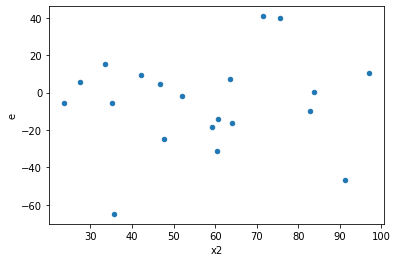

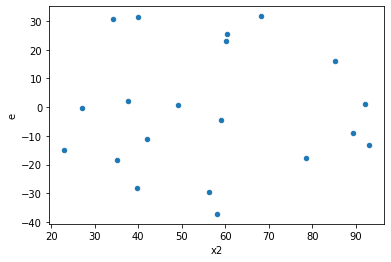

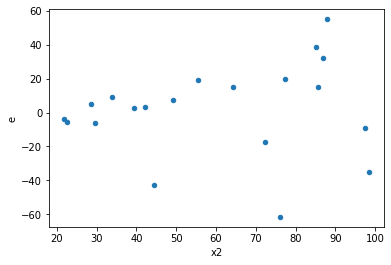

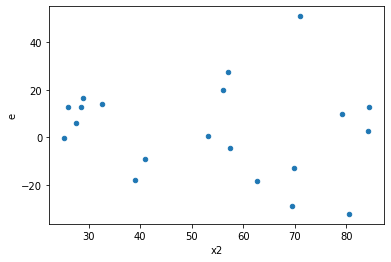

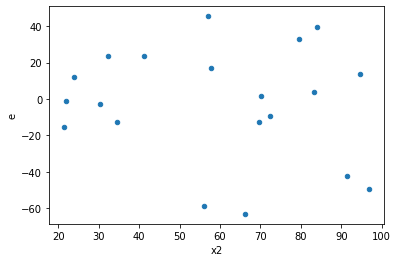

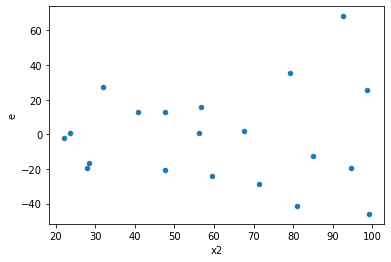

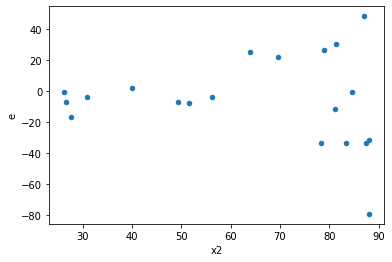

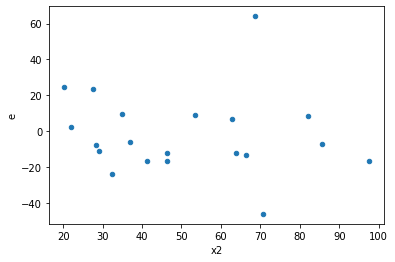

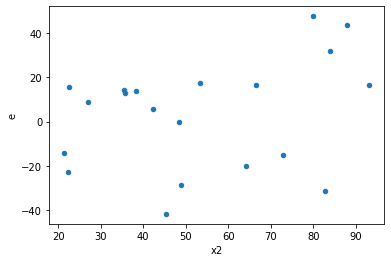

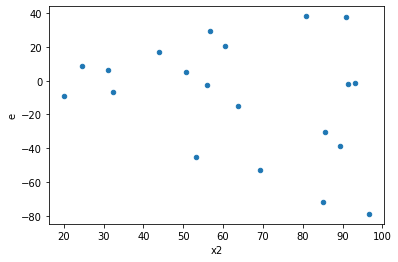

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,6.0,8.0,1779.652257975159,10489.463855793927,296.6087096625265,1311.1829819742409,4.420581524615612,0.05752645648022403,0.971236771759888,0.028763228240112015,Reject001=1 : Homoscedasticity
3.0,8.0,6.0,1459.0343531730698,3498.858286200536,182.37929414663373,583.1430477000894,3.1974191501763345,0.1739524738691116,0.9130237630654442,0.0869762369345558,Reject001=1 : Homoscedasticity
4.0,9.0,5.0,8149.994155390284,4887.597726637334,905.5549061544759,977.5195453274667,1.0794702106784395,0.986732945101912,0.506633527449044,0.493366472550956,Reject001=1 : Homoscedasticity
6.0,8.0,6.0,3144.2707122411953,8077.310147795222,393.0338390301494,1346.2183579658704,3.425197080454446,0.1509389496101985,0.9245305251949008,0.07546947480509925,Reject001=1 : Homoscedasticity
8.0,5.0,9.0,466.7978667536893,8078.536381547992,93.35957335073786,897.6151535053325,9.614602137620397,0.0041319506426742425,0.9979340246786629,0.0020659753213371213,Reject001=0 : Heteroscedasticity
9.0,7.0,7.0,5662.238220212051,8771.177719234598,808.8911743160072,1253.0253884620854,1.5490654716583292,0.5778070016180343,0.7110964991909828,0.28890350080901717,Reject001=1 : Homoscedasticity
10.0,4.0,10.0,3341.2528430153393,24422.882588667686,835.3132107538348,2442.2882588667685,2.9237993933589372,0.1537682401237186,0.9231158799381407,0.0768841200618593,Reject001=1 : Homoscedasticity
12.0,5.0,9.0,2179.5137431758008,8469.783716843744,435.90274863516015,941.0870796493049,2.1589381636062397,0.29808837080995376,0.8509558145950231,0.14904418540497688,Reject001=1 : Homoscedasticity
13.0,8.0,6.0,4927.108529407186,9719.736673077408,615.8885661758983,1619.956112179568,2.63027469764215,0.25512265415597857,0.8724386729220107,0.12756132707798928,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,10.0,3256.09981932717,2791.5742940799537,814.0249548317925,279.1574294079954,0.3429347316086638,0.3139684017573577,Reject001=1 : Homoscedasticity
1.0,5.0,9.0,3121.5532356362173,2571.4731736114,624.3106471272434,285.7192415123778,0.45765556430458265,0.4031772209854994,Reject001=1 : Homoscedasticity
2.0,6.0,8.0,1779.652257975159,10489.463855793927,296.6087096625265,1311.1829819742409,4.420581524615612,0.05752645648022403,Reject001=1 : Homoscedasticity
3.0,8.0,6.0,1459.0343531730698,3498.858286200536,182.37929414663373,583.1430477000894,3.1974191501763345,0.1739524738691116,Reject001=1 : Homoscedasticity
4.0,9.0,5.0,8149.994155390284,4887.597726637334,905.5549061544759,977.5195453274667,1.0794702106784395,0.986732945101912,Reject001=1 : Homoscedasticity
5.0,10.0,4.0,3687.8686224083226,1279.00315333801,368.78686224083225,319.7507883345025,0.8670341085135855,0.7738107168274587,Reject001=1 : Homoscedasticity
6.0,8.0,6.0,3144.2707122411953,8077.310147795222,393.0338390301494,1346.2183579658704,3.425197080454446,0.1509389496101985,Reject001=1 : Homoscedasticity
7.0,8.0,6.0,2655.2960997706546,760.5019202487273,331.9120124713318,126.75032004145454,0.38187927908274283,0.20837535164434678,Reject001=1 : Homoscedasticity
8.0,5.0,9.0,466.7978667536893,8078.536381547992,93.35957335073786,897.6151535053325,9.614602137620397,0.0041319506426742425,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      882
Reject001=0 : Heteroscedasticity    118
Name: Result_test, dtype: int64